# テストの続き

In [124]:
import pandas as pd
import numpy as np

#前処理済みのデータを持ってくる
df = pd.read_csv('./data/adult/adult_treated.csv', header=0,)

X = df.iloc[:,:-1]
#pd.to_csvで行数が１列目に入るので削除
X = X.drop('Unnamed: 0', axis=1)
y = df.iloc[:,[-1]]

#check the shape
print('----------------------------------------------------------------------------------------')
print('Raw shape: (%i,%i)' %df.shape)
print('X shape: (%i,%i)' %X.shape)
print('y shape: (%i,%i)' %y.shape)
print('----------------------------------------------------------------------------------------')
print(X.dtypes)
print('----------------------------------------------------------------------------------------')
print('Check the null count of the target variable: %i' % y.isnull().sum())
print('----------------------------------------------------------------------------------------')
X.join(y).head()

----------------------------------------------------------------------------------------
Raw shape: (32561,17)
X shape: (32561,15)
y shape: (32561,1)
----------------------------------------------------------------------------------------
Age                                  float64
Fnlwgt                               float64
Education_num                        float64
Capital_Gain                         float64
Capital_Loss                         float64
Hours_Per_Week                       float64
Workclass_Self-emp-not-inc           float64
Marital_Status_Married-civ-spouse    float64
Occupation_Exec-managerial           float64
Occupation_Farming-fishing           float64
Occupation_Other-service             float64
Occupation_Prof-specialty            float64
Occupation_Tech-support              float64
Relationship_Wife                    float64
Sex_Male                             float64
dtype: object
------------------------------------------------------------------------

,Age,Fnlwgt,Education_num,Capital_Gain,Capital_Loss,Hours_Per_Week,Workclass_Self-emp-not-inc,Marital_Status_Married-civ-spouse,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Other-service,Occupation_Prof-specialty,Occupation_Tech-support,Relationship_Wife,Sex_Male,Income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [125]:
import pandas as pd

# import sample data
# Loan screening data for classification 
df_s = pd.read_csv('./data/adult/adult_test_treated.csv', header=0,)
X_s = df_s.iloc[:,:-1]
X_s = X_s.drop('Unnamed: 0', axis=1)
y_s = df_s.iloc[:,[-1]]

print('----------------------------------------------------------------------------------------')
print('Raw shape: (%i,%i)' %df_s.shape)
print('X_s shape: (%i,%i)' %X_s.shape)
print('y_s shape: (%i,%i)' %y_s.shape)
print(X_s.dtypes)

----------------------------------------------------------------------------------------
Raw shape: (16281,17)
X_s shape: (16281,15)
y_s shape: (16281,1)
Age                                  float64
Fnlwgt                               float64
Education_num                        float64
Capital_Gain                         float64
Capital_Loss                         float64
Hours_Per_Week                       float64
Workclass_Self-emp-not-inc           float64
Marital_Status_Married-civ-spouse    float64
Occupation_Exec-managerial           float64
Occupation_Farming-fishing           float64
Occupation_Other-service             float64
Occupation_Prof-specialty            float64
Occupation_Tech-support              float64
Relationship_Wife                    float64
Sex_Male                             float64
dtype: object


In [70]:
# import basice apis
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,r2_score

from skgarden.mondrian.ensemble import MondrianForestClassifier


# data Standardization
scaler = StandardScaler()
scaler.fit(X)
X_scl = scaler.transform(X)
X_s_scl = scaler.transform(X_s)

#set learning machine
lgr = LogisticRegression()
svc = LinearSVC()
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
mfc = MondrianForestClassifier()


learner_list = [lgr, svc, rfc, gbc, mfc]
learner_name = ['LogisticRegression', 'LinearSVC', 'RandomForest','GradientBoosting', 'MondrianForest' ]
result_name = ['lgr', 'svc', 'rfc','gbr', 'mfc']

In [48]:
#さっきと同じようにデータ数とscoreを格納


def calc_score_array_100(X_use, y_use, larener):
    i = 0
    i_list = []
    ac_list = []
    f1_list = []
    N = X_use.shape[0]
    while i < N:
        i += 100
        X_data = X_use[:i, :]    #データ数を大きくしてく
        y_data = y_use[:i]
        larener.fit(X_data, y_data.as_matrix().ravel())
        ac_sco = accuracy_score(y_s.as_matrix().ravel(), larener.predict(X_s_scl))
        f1_sco = f1_score(y_s.as_matrix().ravel(), larener.predict(X_s_scl))
        i_list.append(i)
        ac_list.append(ac_sco)
        f1_list.append(f1_sco)
    i_array = np.array(i_list)
    ac_array = np.array(ac_list)
    f1_array = np.array(f1_list)
    return i_array, ac_array, f1_array


In [49]:
#test
result_rfc_1 = calc_score_array_100(X_scl[:1000,:], y[:1000], rfc)
print('end')

end


In [50]:
result_rfc = calc_score_array_100(X_scl, y, rfc)
print('end')

end


In [51]:
result_gbc = calc_score_array_100(X_scl, y, gbc)
print('end')

end


In [52]:
result_mfc = calc_score_array_100(X_scl, y, mfc)
print('end')

end


In [53]:
result_svc = calc_score_array_100(X_scl, y, svc)
print('end')

end


In [54]:
result_lgr = calc_score_array_100(X_scl, y, lgr)
print('end')

end


In [96]:
#partial_fitでも同じように


i = 0
i_list = []
ac_list = []
f1_list = []
N = X_scl.shape[0]
mfc2 = MondrianForestClassifier()
while i < N:
    i += 100
    X_data = X_scl[:i, :]    #データ数を大きくしてく
    y_data = y[:i]
    mfc2.partial_fit(X_data, y_data.as_matrix().ravel())
    ac_sco = accuracy_score(y_s.as_matrix().ravel(), mfc2.predict(X_s_scl))
    f1_sco = f1_score(y_s.as_matrix().ravel(), mfc2.predict(X_s_scl))
    i_list.append(i)
    ac_list.append(ac_sco)
    f1_list.append(f1_sco)
    mfc2 = MondrianForestClassifier()
i_array = np.array(i_list)
ac_array = np.array(ac_list)
f1_array = np.array(f1_list)
result_mfc_p= (i_array, ac_array, f1_array)
print('end')

end


In [ ]:
#テスト
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot(result_rfc_1, 'RandomForest')
plt.title('calculationtime of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.show()

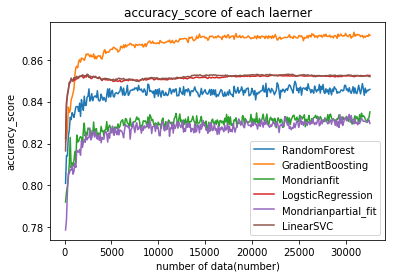

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_ac(result_rfc, 'RandomForest')
result_plot_ac(result_gbc, 'GradientBoosting')
result_plot_ac(result_mfc, 'Mondrianfit')
result_plot_ac(result_lgr, 'LogsticRegression')
result_plot_ac(result_mfc_p, 'Mondrianpartial_fit')
result_plot_ac(result_svc, 'LinearSVC')

plt.title('accuracy_score of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('accuracy_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('accuracy_score of each laerner', dpi=500)
plt.show()


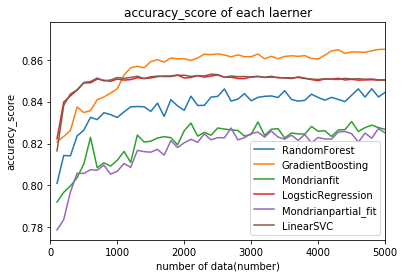

In [107]:
#軸の調整
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_ac(result_rfc, 'RandomForest')
result_plot_ac(result_gbc, 'GradientBoosting')
result_plot_ac(result_mfc, 'Mondrianfit')
result_plot_ac(result_lgr, 'LogsticRegression')
result_plot_ac(result_mfc_p, 'Mondrianpartial_fit')
result_plot_ac(result_svc, 'LinearSVC')

plt.title('accuracy_score of each laerner')
plt.xlim([0,5000])
plt.xlabel('number of data(number)')
plt.ylabel('accuracy_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('accuracy_score of each laerner xlim', dpi=500)
plt.show()


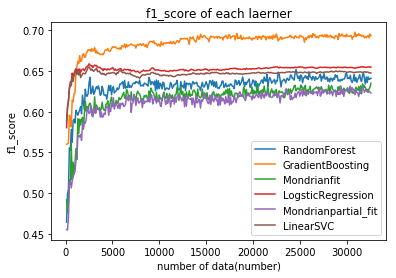

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_f1(result_rfc, 'RandomForest')
result_plot_f1(result_gbc, 'GradientBoosting')
result_plot_f1(result_mfc, 'Mondrianfit')
result_plot_f1(result_lgr, 'LogsticRegression')
result_plot_f1(result_mfc_p, 'Mondrianpartial_fit')
result_plot_f1(result_svc, 'LinearSVC')

plt.title('f1_score of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('f1_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('f1_score of each laerner', dpi=500)
plt.show()


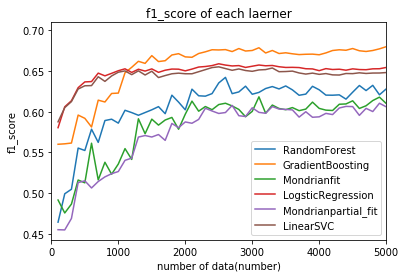

In [106]:
#軸の調整
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_f1(result_rfc, 'RandomForest')
result_plot_f1(result_gbc, 'GradientBoosting')
result_plot_f1(result_mfc, 'Mondrianfit')
result_plot_f1(result_lgr, 'LogsticRegression')
result_plot_f1(result_mfc_p, 'Mondrianpartial_fit')
result_plot_f1(result_svc, 'LinearSVC')

plt.title('f1_score of each laerner')
plt.xlim([0,5000])
plt.xlabel('number of data(number)')
plt.ylabel('f1_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('f1_score of each laerner xlim', dpi=500)
plt.show()


次に順次処理のスコア

In [110]:
i = 0
i_list = []
ac_list = []
f1_list = []
N = X_scl.shape[0]
n = 0
mfc3 = MondrianForestClassifier()
while i < N:
    i += 1000
    X_data = X_scl[i-1000:i, :]    #次のデータで学習
    y_data = y[i-1000:i]
    mfc3.partial_fit(X_data, y_data.as_matrix().ravel())
    ac_sco = accuracy_score(y_s.as_matrix().ravel(), mfc3.predict(X_s_scl))
    f1_sco = f1_score(y_s.as_matrix().ravel(), mfc3.predict(X_s_scl))
    
    n += X_data.shape[0]
    i_list.append(n)
    ac_list.append(ac_sco)
    f1_list.append(f1_sco)
i_array = np.array(i_list)
ac_array = np.array(ac_list)
f1_array = np.array(f1_list)

result_mfc_p_1000 = (i_array, ac_array, f1_array)
print('end')

end


In [111]:
i = 0
i_list = []
ac_list = []
f1_list = []
N = X_scl.shape[0]
n = 0
mfc3 = MondrianForestClassifier()
while i < N:
    i += 100
    X_data = X_scl[i-100:i, :]    #次のデータで学習
    y_data = y[i-100:i]
    mfc3.partial_fit(X_data, y_data.as_matrix().ravel())
    ac_sco = accuracy_score(y_s.as_matrix().ravel(), mfc3.predict(X_s_scl))
    f1_sco = f1_score(y_s.as_matrix().ravel(), mfc3.predict(X_s_scl))
    
    n += X_data.shape[0]
    i_list.append(n)
    ac_list.append(ac_sco)
    f1_list.append(f1_sco)
i_array = np.array(i_list)
ac_array = np.array(ac_list)
f1_array = np.array(f1_list)

result_mfc_p_100 = (i_array, ac_array, f1_array)
print('end')

end


In [117]:
i = 0
i_list = []
ac_list = []
f1_list = []
N = X_scl.shape[0]
n = 0
mfc3 = MondrianForestClassifier()
while i < N:
    i += 10000
    X_data = X_scl[i-10000:i, :]    #次のデータで学習
    y_data = y[i-10000:i]
    mfc3.partial_fit(X_data, y_data.as_matrix().ravel())
    ac_sco = accuracy_score(y_s.as_matrix().ravel(), mfc3.predict(X_s_scl))
    f1_sco = f1_score(y_s.as_matrix().ravel(), mfc3.predict(X_s_scl))
    
    n += X_data.shape[0]
    i_list.append(n)
    ac_list.append(ac_sco)
    f1_list.append(f1_sco)
i_array = np.array(i_list)
ac_array = np.array(ac_list)
f1_array = np.array(f1_list)
result_mfc_p_10000 = (i_array, ac_array, f1_array)
print('end')

end


In [128]:
X_use = X_s_scl[:500,:]
y_use = y_s[:500]
i = 0
i_list = []
ac_list = []
f1_list = []
N = X_scl.shape[0]
n = 0
mfc3 = MondrianForestClassifier()
while i < N:
    i += 10
    X_data = X_scl[i-10:i, :]    #次のデータで学習
    y_data = y[i-10:i]
    mfc3.partial_fit(X_data, y_data.as_matrix().ravel())
    ac_sco = accuracy_score(y_use.as_matrix().ravel(), mfc3.predict(X_use))
    f1_sco = f1_score(y_use.as_matrix().ravel(), mfc3.predict(X_use))
    
    n += X_data.shape[0]
    i_list.append(n)
    ac_list.append(ac_sco)
    f1_list.append(f1_sco)
i_array = np.array(i_list)
ac_array = np.array(ac_list)
f1_array = np.array(f1_list)

result_mfc_p_10 = (i_array, ac_array, f1_array)
print('end')

end


In [130]:
X_use = X_s_scl[:500,:]
y_use = y_s[:500]
mfc3 = MondrianForestClassifier()
#mfc3.fit(X_scl[:100,:], y[:100].as_matrix().ravel())
i = 0
i_list = []
ac_list = []
f1_list = []
N = X_scl.shape[0]
n = 0

while i < N:
    i += 8
    X_data = X_scl[i-8:i, :]    #次のデータで学習
    y_data = y[i-8:i]
    mfc3.partial_fit(X_data, y_data.as_matrix().ravel())
    ac_sco = accuracy_score(y_use.as_matrix().ravel(), mfc3.predict(X_use))
    f1_sco = f1_score(y_use.as_matrix().ravel(), mfc3.predict(X_use))
    
    n += X_data.shape[0]
    i_list.append(n)
    ac_list.append(ac_sco)
    f1_list.append(f1_sco)
i_array = np.array(i_list)
ac_array = np.array(ac_list)
f1_array = np.array(f1_list)

result_mfc_p_2 = (i_array, ac_array, f1_array)
print('end')

end


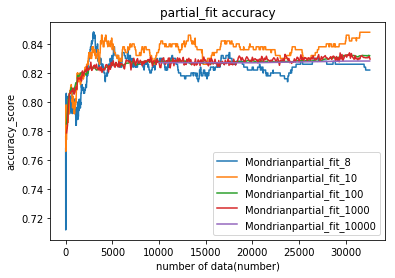

In [138]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_ac(result_mfc_p_2,'Mondrianpartial_fit_8')    
result_plot_ac(result_mfc_p_10,'Mondrianpartial_fit_10')
result_plot_ac(result_mfc_p_100,'Mondrianpartial_fit_100')
result_plot_ac(result_mfc_p, 'Mondrianpartial_fit_1000')
result_plot_ac(result_mfc_p_10000,'Mondrianpartial_fit_10000')
plt.title('partial_fit accuracy')
plt.xlabel('number of data(number)')
plt.ylabel('accuracy_score')
#凡例の表示
plt.legend(loc='lower right')
# プロット表示(設定の反映)
plt.savefig('partial_fit accuracy', dpi=500)
plt.show()

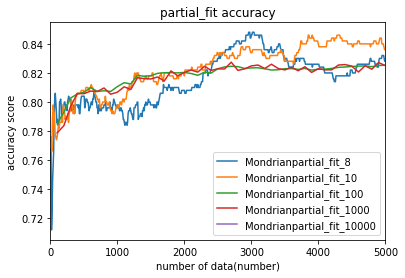

In [139]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_ac(result_mfc_p_2,'Mondrianpartial_fit_8')    
result_plot_ac(result_mfc_p_10,'Mondrianpartial_fit_10')
result_plot_ac(result_mfc_p_100,'Mondrianpartial_fit_100')
result_plot_ac(result_mfc_p, 'Mondrianpartial_fit_1000')
result_plot_ac(result_mfc_p_10000,'Mondrianpartial_fit_10000')
plt.title('partial_fit accuracy')
plt.xlim([0,5000])
plt.xlabel('number of data(number)')
plt.ylabel('accuracy score')
#凡例の表示
plt.legend(loc='lower right')
# プロット表示(設定の反映)
plt.savefig('partial_fit accuracy xlim', dpi=500)
plt.show()

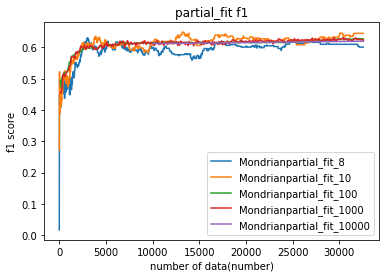

In [141]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_f1(result_mfc_p_2,'Mondrianpartial_fit_8')    
result_plot_f1(result_mfc_p_10,'Mondrianpartial_fit_10')
result_plot_f1(result_mfc_p_100,'Mondrianpartial_fit_100')
result_plot_f1(result_mfc_p, 'Mondrianpartial_fit_1000')
result_plot_f1(result_mfc_p_10000,'Mondrianpartial_fit_10000')
plt.title('partial_fit f1')

plt.xlabel('number of data(number)')
plt.ylabel('f1 score')
#凡例の表示
plt.legend(loc='lower right')
# プロット表示(設定の反映)
plt.savefig('partial_fit f1', dpi=500)
plt.show()

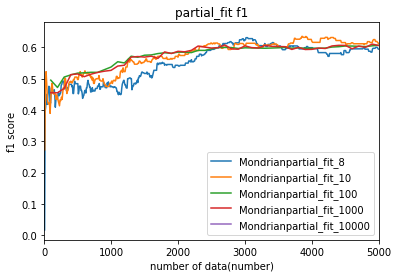

In [144]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_f1(result_mfc_p_2,'Mondrianpartial_fit_8')    
result_plot_f1(result_mfc_p_10,'Mondrianpartial_fit_10')
result_plot_f1(result_mfc_p_100,'Mondrianpartial_fit_100')
result_plot_f1(result_mfc_p, 'Mondrianpartial_fit_1000')
result_plot_f1(result_mfc_p_10000,'Mondrianpartial_fit_10000')
plt.title('partial_fit f1')
plt.xlim([0,5000])
plt.xlabel('number of data(number)')
plt.ylabel('f1 score')
#凡例の表示
plt.legend(loc='lower right')
# プロット表示(設定の反映)
plt.savefig('partial_fit f1_xlim', dpi=500)
plt.show()

あと、追加学習のスコアを他と比べてないのでやる。

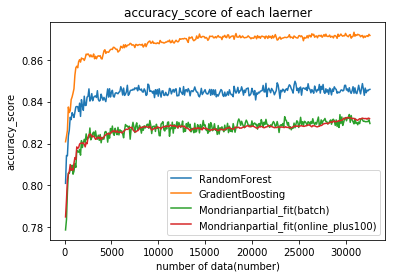

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_ac(result_rfc, 'RandomForest')
result_plot_ac(result_gbc, 'GradientBoosting')
result_plot_ac(result_mfc_p, 'Mondrianpartial_fit(batch)')
result_plot_ac(result_mfc_p_100, 'Mondrianpartial_fit(online_plus100)')

plt.title('accuracy_score of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('accuracy_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('accuracy_score of each laerner', dpi=500)
plt.show()


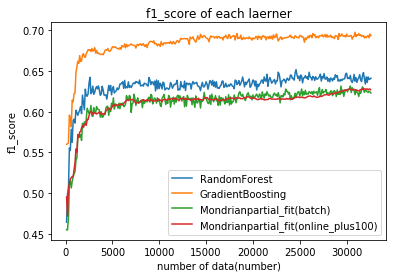

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot_ac(result, name):
    x,y,z = result
    plt.plot(x, y, label=name)
def result_plot_f1(result, name):
    x,y,z = result
    plt.plot(x, z, label = name)
result_plot_f1(result_rfc, 'RandomForest')
result_plot_f1(result_gbc, 'GradientBoosting')
result_plot_f1(result_mfc_p, 'Mondrianpartial_fit(batch)')
result_plot_f1(result_mfc_p_100, 'Mondrianpartial_fit(online_plus100)')

plt.title('f1_score of each laerner')
plt.xlabel('number of data(number)')
plt.ylabel('f1_score')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('f1_score of each laerner', dpi=500)
plt.show()
